In [1]:
# 라이브러리 설치
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 라이브러리 로드
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# os(운영)에 따라서 설정을 변경할 때 사용할 라이브러리
import platform

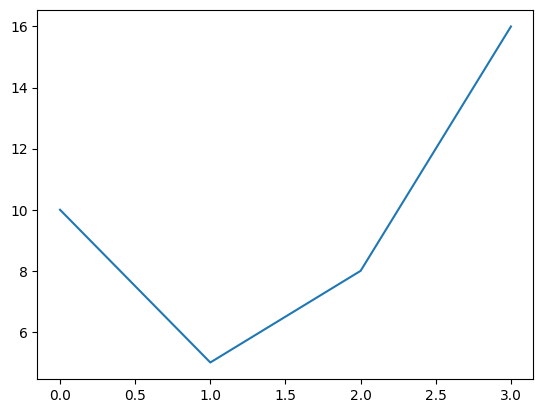

In [4]:
# matplotlib을 이용한 그래프 시각화

# 선 그래프 (플롯 그래프)

# y축 데이터만 존재하는 경우
y=[10,5,8,16]
plt.plot(y)

# show() 함수는 print()와 같은 기능, 생략 가능(?)
plt.show()

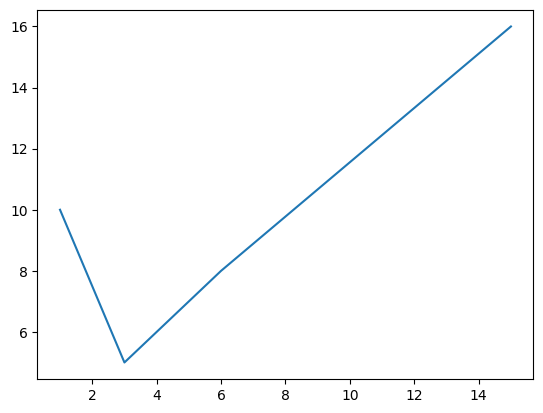

In [6]:
x=[1,3,6,15]
plt.plot(x,y)
plt.show()

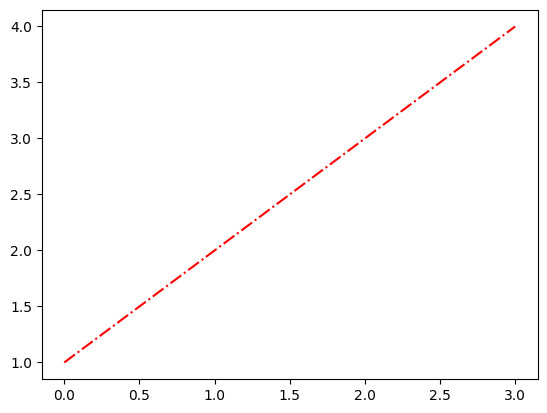

In [13]:
plt.plot([1,2,3,4], "r-.")
# 레드컬러 형태-. -> "r-."
plt.show()

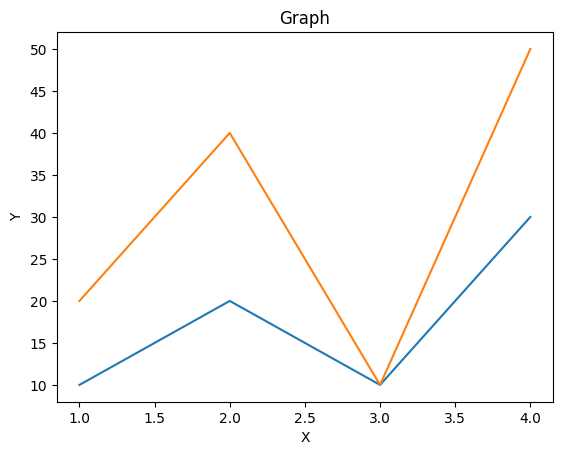

In [15]:
# x축, y축, 그래프의 이름
plt.plot([1,2,3,4],[10,20,10,30])
plt.plot([1,2,3,4],[20,40,10,50])

# x축에 이름 지정
plt.xlabel("X")

# y축에 이름 지정
plt.ylabel("Y")

# 그래프에 이름 지정
plt.title("Graph")

plt.show()

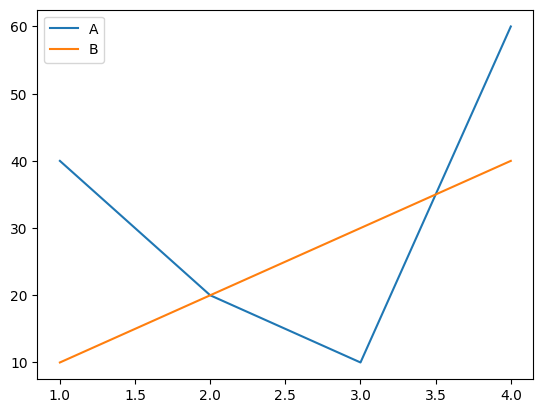

In [18]:
# 범례 추가
plt.plot([1,2,3,4], [40,20,10,60])
plt.plot([1,2,3,4], [10,20,30,40])
plt.legend(["A","B"])
plt.show()


In [21]:
# 그래프 시각화에서 한글 ㅁㅁㅁ 오류 해결
# matplot에 있는 폰트의 설정 변경
plt.rc("font", family="Malgun Gothic")
# 윈도우 기준

In [ ]:
# MAC의 경우
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
    # 윈도우

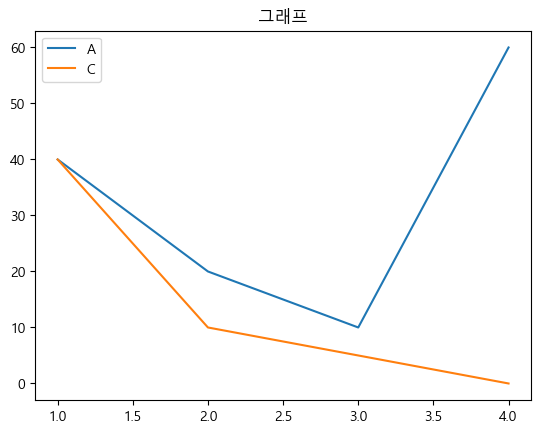

In [22]:

plt.plot([1,2,3,4],[40,20,10,60], label="A")
plt.plot([1,2,3,4],[40,10,5,0], label="C")
plt.legend()
plt.title("그래프")
plt.show()

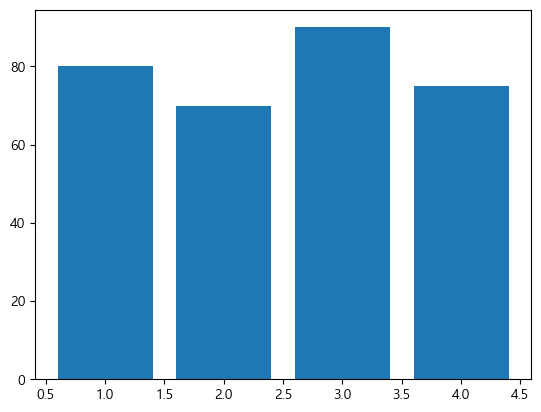

In [24]:
# 바형 그래프
x=[1,2,3,4]
y=[80,70,90,75]

plt.bar(x,y)
# plot(선 그래프)는 y값만 있어도 가능, bar 그래프는 x, y 필수
plt.show()

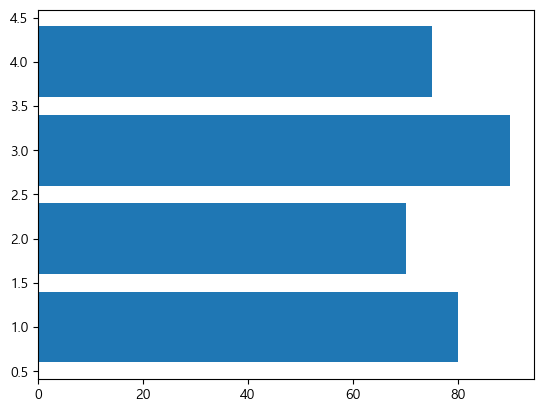

In [26]:
# 회전
plt.barh(x,y)
plt.show()

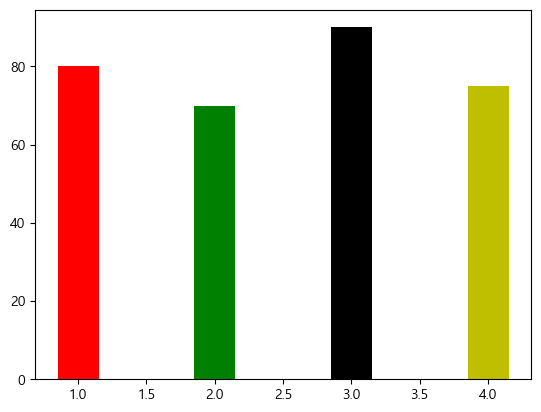

In [27]:
# 옵션 추가
# 색, 너비 변경 -> 너비 0~1 사이의 값으로 설정
plt.bar(x,y,color=["r","g","k","y"],width=0.3)
plt.show()

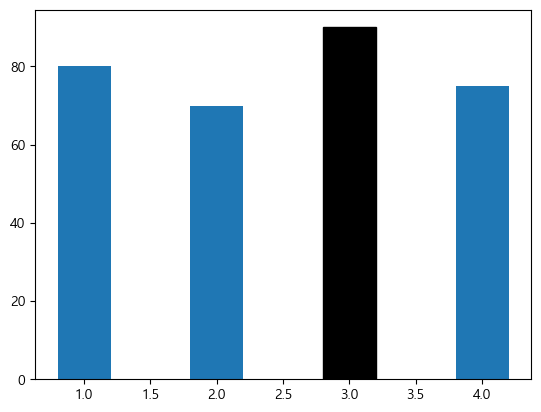

In [32]:
# bar 그래프에서 특정 막대의 색상 변경
graph=plt.bar(x,y,width=0.4)
graph[2].set_color("k")
# 세 번째 막대의 컬러를 블랙으로 변경
plt.show()

In [33]:
# 산점도 그래프 (데이터 분포 확인)
x=np.random.random(30)
y=np.random.random(30)
# 0부터 1까지 랜덤 데이터 30개 생성

In [34]:
x

array([0.69296393, 0.45359128, 0.90416323, 0.77420493, 0.0636176 ,
       0.14328395, 0.58124117, 0.95373786, 0.33840528, 0.27154468,
       0.48635075, 0.45322071, 0.87325209, 0.40779974, 0.22430256,
       0.09559963, 0.99993561, 0.19602355, 0.78808353, 0.74061376,
       0.18437858, 0.76220028, 0.16753047, 0.26229442, 0.02879116,
       0.74873335, 0.47080425, 0.88949753, 0.02731541, 0.23582576])

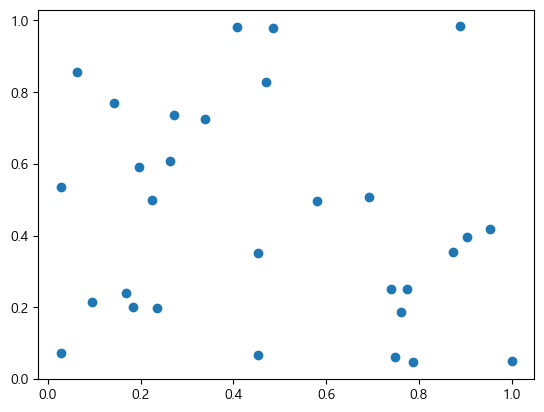

In [35]:
plt.scatter(x,y)
plt.show()

In [36]:
# 샘플 데이터
df=pd.read_csv("csv/drinks.csv")

In [37]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [56]:
# 맥주, 위스키, 와인의 각 소비량과 순수 알콜의 상관관계 확인
# 피어슨 상관계수
    # -1: 음의 상관관계, 반비례
    #  1: 양의 상관관계, 비례
    #  0: 무관

a=["beer_servings","spirit_servings","wine_servings","total_litres_of_pure_alcohol"]
corr=df[a].corr("pearson")

corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


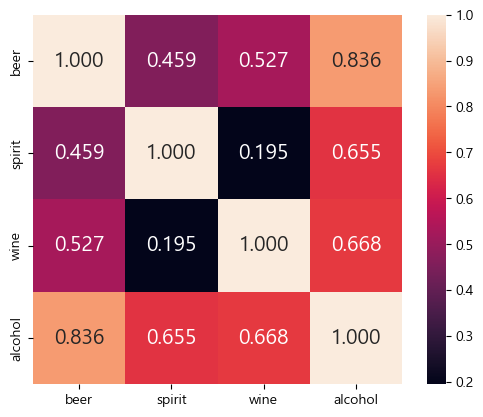

In [58]:
# seaborn 라이브러리를 이용하여 히트맵 시각화

b=["beer", "spirit", "wine", "alcohol"]

hm=sns.heatmap(
    corr.values,
    cbar=True, # 사이드바 유무
    annot=True, # 히트맵의 수치 표기 유무
    square=True, # 정사각형 표기
    fmt="0.3f", # 수치의 소수점 자리수
    annot_kws={"size":15}, #수치의 크기
    xticklabels=b,
    yticklabels=b
)

plt.show()

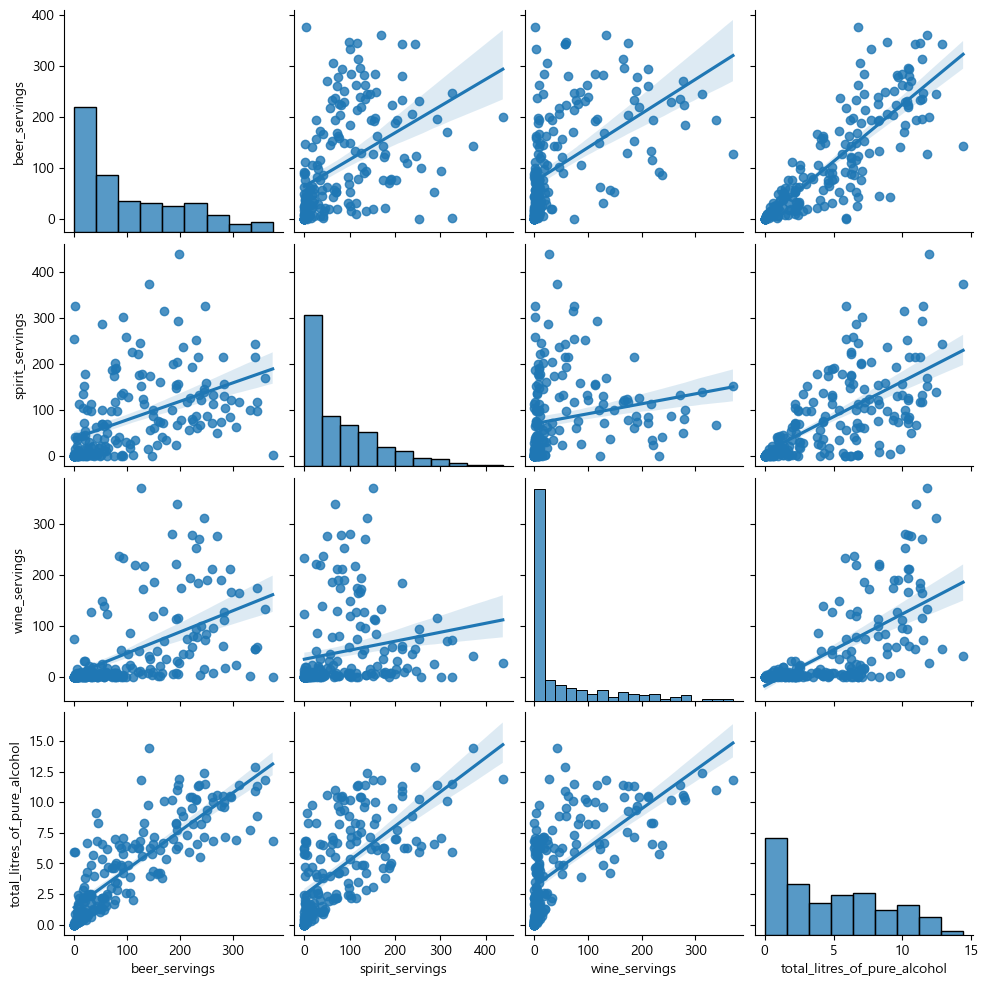

In [67]:
sns.pairplot(
    df[a],
    height=2.5, # 그래프 크기
    kind="reg"
)
plt.show()